 # Q.2 Use decision trees to prepare a model on fraud data. treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

## Import required lib

In [85]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from pickle import dump
from pickle import load

## Import dataset

In [2]:
check_data = pd.read_csv('Fraud_check.csv')
check_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## Initial analysis

In [3]:
check_data.shape

(600, 6)

In [4]:
check_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
check_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [6]:
check_data[check_data.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [7]:
check_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [9]:
check_data1 = check_data.rename(columns={'Marital.Status':'Maritalstatus','Taxable.Income':'Income',
                                         'City.Population':'population','Work.Experience':'experience'})
check_data1.head()

,Undergrad,Maritalstatus,Income,population,experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## use encoding techniques

In [11]:
check_new = pd.get_dummies(data = check_data1,columns=['Undergrad','Maritalstatus','Urban'])
check_new

,Income,population,experience,Undergrad_NO,Undergrad_YES,Maritalstatus_Divorced,Maritalstatus_Married,Maritalstatus_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [12]:
check_new.dtypes

Income                    int64
population                int64
experience                int64
Undergrad_NO              uint8
Undergrad_YES             uint8
Maritalstatus_Divorced    uint8
Maritalstatus_Married     uint8
Maritalstatus_Single      uint8
Urban_NO                  uint8
Urban_YES                 uint8
dtype: object

In [21]:
x = check_new.drop(labels = 'Income',axis = 1)
y = check_new[['Income']]

In [22]:
x.head()

,population,experience,Undergrad_NO,Undergrad_YES,Maritalstatus_Divorced,Maritalstatus_Married,Maritalstatus_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0


In [40]:
# use minimax scalar
def nor_func(i):
    x = (i - i.min())/(i.max()-i.min())
    return (x)

In [42]:
x_norm = nor_func(x.iloc[:,0:])
x_norm.head()

,population,experience,Undergrad_NO,Undergrad_YES,Maritalstatus_Divorced,Maritalstatus_Married,Maritalstatus_Single,Urban_NO,Urban_YES
0,0.139472,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.622394,0.600000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.772568,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.962563,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.010081,0.933333,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [23]:
y.head()

,Income
0,68833
1,33700
2,36925
3,50190
4,81002


In [24]:
y['Tax income'] = 'Good'
y.loc[y['Income']<=30000,'Tax income'] = 'risky'
y.drop(labels = 'Income',axis = 1,inplace = True)
y

,Tax income
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [30]:
le = LabelEncoder()
y['Tax Income'] = le.fit_transform(y['Tax income'])
y.drop(labels = 'Tax income',axis = 1,inplace = True)
y

,Tax Income
0,0
1,0
2,0
3,0
4,0
...,...
595,0
596,0
597,0
598,0


In [31]:
y.value_counts()    # 0 = Good, 1 = risky

Tax Income
0             476
1             124
dtype: int64

## Model building

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x_norm,y,test_size=0.20,random_state=12)

In [44]:
x_train.shape,y_train.shape

((480, 9), (480, 1))

In [45]:
x_test.shape,y_test.shape

((120, 9), (120, 1))

In [46]:
x_train.head()

,population,experience,Undergrad_NO,Undergrad_YES,Maritalstatus_Divorced,Maritalstatus_Married,Maritalstatus_Single,Urban_NO,Urban_YES
281,0.813936,0.233333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
571,0.400244,0.233333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
543,0.603664,0.433333,1.0,0.0,0.0,0.0,1.0,1.0,0.0
421,0.628774,0.433333,0.0,1.0,0.0,0.0,1.0,1.0,0.0
85,0.571130,0.400000,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [47]:
y_train.head()

,Tax Income
281,0
571,0
543,0
421,0
85,1


In [48]:
x_test.head()

,population,experience,Undergrad_NO,Undergrad_YES,Maritalstatus_Divorced,Maritalstatus_Married,Maritalstatus_Single,Urban_NO,Urban_YES
326,0.800131,0.633333,0.0,1.0,1.0,0.0,0.0,0.0,1.0
360,0.472175,0.166667,0.0,1.0,0.0,0.0,1.0,0.0,1.0
348,0.094771,0.066667,0.0,1.0,0.0,0.0,1.0,1.0,0.0
567,0.598469,1.000000,0.0,1.0,0.0,0.0,1.0,1.0,0.0
244,0.740625,0.900000,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [49]:
y_test.head()

,Tax Income
326,1
360,0
348,0
567,1
244,0


## Create model

In [52]:
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=5)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

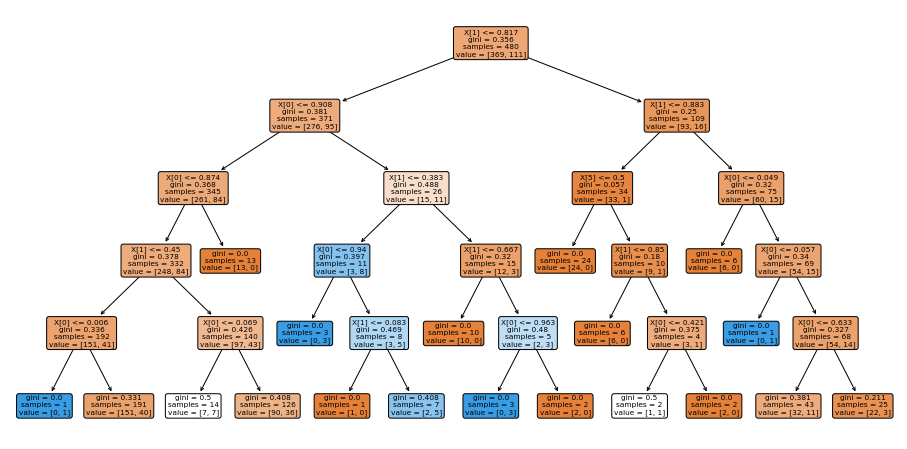

In [56]:
plt.figure(figsize = (16,8))
plot_tree(dt_model,rounded=True,filled=True)
plt.show()

In [57]:
y_train_pred = dt_model.predict(x_train)

In [58]:
accuracy_score(y_train,y_train_pred)   # training data
# 79.16 % accurancy level

0.7916666666666666

In [59]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       369
           1       0.87      0.12      0.21       111

    accuracy                           0.79       480
   macro avg       0.83      0.56      0.54       480
weighted avg       0.81      0.79      0.72       480



In [60]:
confusion_matrix(y_train,y_train_pred)

array([[367,   2],
       [ 98,  13]], dtype=int64)

In [61]:
# testing data
y_test_pred = dt_model.predict(x_test)

In [62]:
accuracy_score(y_test,y_test_pred)
# 85% accurancy level

0.85

In [63]:
confusion_matrix(y_test,y_test_pred)

array([[102,   5],
       [ 13,   0]], dtype=int64)

In [64]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       107
           1       0.00      0.00      0.00        13

    accuracy                           0.85       120
   macro avg       0.44      0.48      0.46       120
weighted avg       0.79      0.85      0.82       120



### second model

In [65]:
dt_model1 = DecisionTreeClassifier(criterion='entropy',max_depth=3)
dt_model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

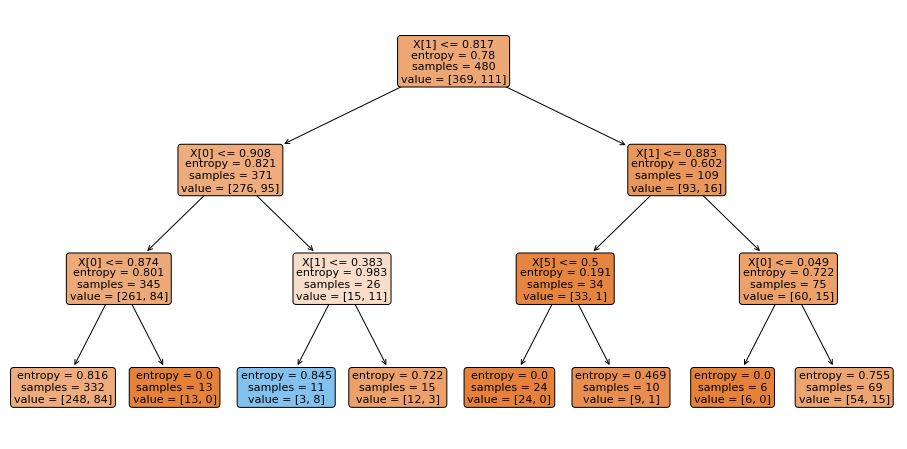

In [75]:
plt.figure(figsize = (16,8))
plot_tree(dt_model1,rounded=True,filled=True)
plt.show()

In [66]:
y_train_pred1 = dt_model1.predict(x_train)   # training data

In [67]:
accuracy_score(y_train,y_train_pred1)
# 77.91 % accurancy level

0.7791666666666667

In [69]:
confusion_matrix(y_train,y_train_pred1)

array([[366,   3],
       [103,   8]], dtype=int64)

In [68]:
print(classification_report(y_train,y_train_pred1))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       369
           1       0.73      0.07      0.13       111

    accuracy                           0.78       480
   macro avg       0.75      0.53      0.50       480
weighted avg       0.77      0.78      0.70       480



In [70]:
y_test_pred1 = dt_model1.predict(x_test)  # testing data

In [71]:
accuracy_score(y_test,y_test_pred1)
# 85% accurancy level

0.85

In [72]:
confusion_matrix(y_test,y_test_pred1)

array([[102,   5],
       [ 13,   0]], dtype=int64)

In [73]:
print(classification_report(y_test,y_test_pred1))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       107
           1       0.00      0.00      0.00        13

    accuracy                           0.85       120
   macro avg       0.44      0.48      0.46       120
weighted avg       0.79      0.85      0.82       120



### use hyperparameter

In [79]:
grid_serch = GridSearchCV(dt_model,param_grid = {'criterion':['gini','entropy'],'max_depth':[3,4,5,6,7,8,9,10]},cv = 5)

In [81]:
grid_serch.fit(x_norm,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]})

In [82]:
grid_serch.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [83]:
grid_serch.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [84]:
grid_serch.best_score_

0.7899999999999999

## model deployment

In [87]:
dump(dt_model1, file = open('dt_model1','wb'))

In [89]:
dt_model1_diploy = load(open('dt_model1','rb'))
dt_model1_diploy

DecisionTreeClassifier(criterion='entropy', max_depth=3)